In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
df = pd.read_csv('../pool_data_202211111622.csv')

In [4]:
df.head()

,pool_id,time_stamp,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'flow switch', 'flow meter',
       'turbidity', 'ORP', 'PH', 'TDS', 'Pressure in tank', 'Pressure in',
       'Pressure out', 'Pump RPM', 'pump current', 'dis_feeder', 'ph_feeder',
       'Fresh water', 'Shw msg', 'Drain', 'Human Counter', 'temperature',
       'water level', 'cppm', 'phfeedtime', 'orpfeedtime',
       'bather in from mens', 'bather in from ladies'],
      dtype='object')

We want to remove some the columns we know aren't necessary.

The following columns are deprecated from the client:
- `flow switch`
- `flow meter`
- `Pressure in tank`
- `Shw msg`
- `phfeedtime`
- `orpfeedtime`

In [6]:
deprecated_col = ['flow switch', 'flow meter', 'Pressure in tank', 'Shw msg', 'phfeedtime', 'orpfeedtime']

df = df.drop(deprecated_col, axis=1)
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,Pump RPM,...,dis_feeder,ph_feeder,Fresh water,Drain,Human Counter,temperature,water level,cppm,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN


Lets tidy up our data. `cppm` is calculated from ORP and thus is not necessary. We also do not have data for `bather in from mens` and `bather in from ladies`. We will remove these as well then look at missing values.

In [7]:
unnecessary_data = ['cppm', 'bather in from mens', 'bather in from ladies']

df = df.drop(unnecessary_data, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'turbidity', 'ORP', 'PH', 'TDS',
       'Pressure in', 'Pressure out', 'Pump RPM', 'pump current', 'dis_feeder',
       'ph_feeder', 'Fresh water', 'Drain', 'Human Counter', 'temperature',
       'water level'],
      dtype='object')

In [8]:
df.isna().sum()

pool_id              0
time_stamp           0
salinity            31
turbidity           31
ORP                  0
PH                   0
TDS                 31
Pressure in         31
Pressure out        31
Pump RPM         43635
pump current        31
dis_feeder       43635
ph_feeder        43635
Fresh water         31
Drain               31
Human Counter       31
temperature          0
water level         31
dtype: int64

In [9]:
len(df)

43635

Comparing our missing data and the len of the dataframe, we see that the columns `Pump RPM`, `dis_feeder`, and `ph_feeder` are completely empty. We will drop those columns.

In [10]:
empty_col = ['Pump RPM', 'dis_feeder', 'ph_feeder']

df = df.drop(empty_col, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'turbidity', 'ORP', 'PH', 'TDS',
       'Pressure in', 'Pressure out', 'pump current', 'Fresh water', 'Drain',
       'Human Counter', 'temperature', 'water level'],
      dtype='object')

In [11]:
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0


In [12]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], utc=True) #Convert to timestamp dtype through UTC
df['time_stamp'] = df['time_stamp'].dt.tz_convert('Canada/Eastern') #Convert back to Canadian Eastern time
df['time_stamp'] = df['time_stamp'].dt.tz_localize(None) #Remove localization information

In [13]:
df['time_stamp'] 

0       2022-11-01 11:01:16.220
1       2022-11-01 11:01:26.323
2       2022-11-01 11:01:36.386
3       2022-11-01 11:01:46.498
4       2022-11-01 11:01:56.554
                  ...          
43630   2022-11-01 11:00:26.794
43631   2022-11-01 11:00:36.852
43632   2022-11-01 11:00:46.971
43633   2022-11-01 11:00:56.031
43634   2022-11-01 11:01:06.155
Name: time_stamp, Length: 43635, dtype: datetime64[ns]

In [14]:
df = df.sort_values(by='time_stamp')
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
39668,10001,2022-11-01 00:00:06.605,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,0.0,0.0,74.2574,500.0
39669,10001,2022-11-01 00:00:16.661,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,0.0,0.0,74.2574,500.0
39670,10001,2022-11-01 00:00:26.768,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39671,10001,2022-11-01 00:00:36.834,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39672,10001,2022-11-01 00:00:46.936,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,0.0,0.0,74.2574,500.0


Today, we're going to focus on creating an alert each time our pH is out of scope. Oour ideal range is 7.2-7.8 pH with a target of 7.6. Lets start by plotting out our pH and seeing where it stands.

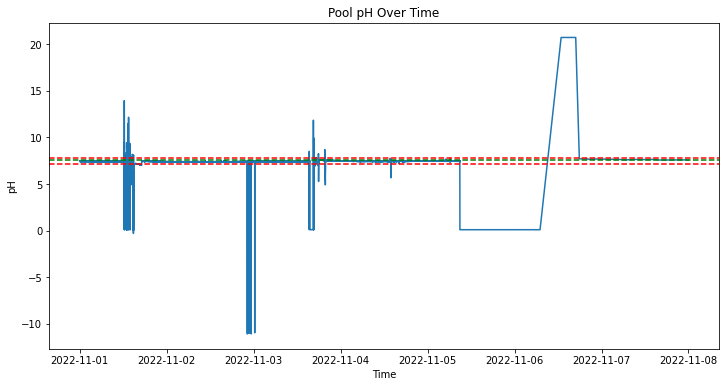

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['time_stamp'], df['PH'])
ax.set_xlabel('Time')
ax.set_ylabel('pH')
ax.set_title('Pool pH Over Time')
ax.axhline(y=7.2, linestyle='--',color='red')
ax.axhline(y=7.8, linestyle='--',color='red')
ax.axhline(y=7.6, linestyle='--',color='green')

In [16]:
time = pd.to_datetime('2022-11-07 21:59:24')
previous_time = str(time-pd.Timedelta("2 minutes"))
str_time = str(time)

print(previous_time, str_time)

2022-11-07 21:57:24 2022-11-07 21:59:24


In [17]:
df = df.reset_index()

In [18]:
time = '2022-11-07 21:59:24'
time = pd.to_datetime(time)
previous_time = time-pd.Timedelta(hours=2)
str_time = str(time)
str_previous_time = str(previous_time)

In [19]:
index = df.index[df['time_stamp'] == '2022-11-07 21:59:24.885'].tolist()
print(index)

[43630]


       index  pool_id              time_stamp  salinity  turbidity      ORP  \
43625  39658    10001 2022-11-07 18:58:34.849   288.134    32.9949  722.599   
43626  39659    10001 2022-11-07 19:58:44.834   287.392    32.6814  721.424   
43627  39660    10001 2022-11-07 19:58:54.891   287.465    32.8381  721.333   
43628  39661    10001 2022-11-07 20:59:04.835   286.723    32.0544  718.530   
43629  39662    10001 2022-11-07 20:59:14.896   286.741    31.7410  718.620   
43630  39663    10001 2022-11-07 21:59:24.885   286.054    31.2708  719.615   

            PH      TDS  Pressure in  Pressure out  pump current  Fresh water  \
43625  7.58726  288.134      2.51555       2.51447           0.0          0.0   
43626  7.58599  287.392      2.51591       2.51483           0.0          0.0   
43627  7.58662  287.465      2.51591       2.51411           0.0          0.0   
43628  7.59359  286.723      2.51628       2.51393           0.0          0.0   
43629  7.58346  286.741      2.51573     

<AxesSubplot:>

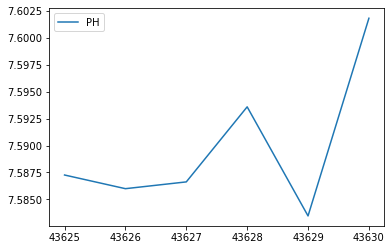

In [20]:
df_time = df.iloc[index[0]-5:index[0]+1] # avoid end of index issues
#print(df.loc(str_time))
print(df_time)
df_time.plot(y='PH', use_index=True)

In [21]:
time = pd.to_datetime('2022-11-07 21:59:24')
previous_time = str(time-pd.Timedelta("24 hours"))
str_time = str(time)

#print(previous_time, str_time)
#df[previous_time:str_time].head()

In [22]:
df_out = df[(df['PH'] < 7.2) | (df['PH'] > 7.8)]
len(df_out)/len(df)

0.18081815056720524

In [57]:
ph_superlow = df[(df['PH'] <= 6)]
ph_low = df[(df['PH'] > 6) & (df['PH'] <= 7.2)]
ph_in = df[(df['PH'] > 7.2) & (df['PH'] <= 7.8)]
ph_high = df[(df['PH'] > 7.8) & (df['PH'] < 9)]
ph_superhigh = df[df['PH'] >= 9]

ph_levels = {'Very Low': {'range':'Less than 6 pH', 'count':len(ph_superlow)}, 
             'Low': {'range':'6pH to 7.2 pH', 'count':len(ph_low)},
             'In-Range': {'range':'7.2pH to 7.8pH', 'count':len(ph_in)},
             'High':{'range':'7.8pH to 9pH', 'count': len(ph_high)}, 
             'Very High': {'range':'Greater than 9 pH', 'count': len(ph_superhigh)}}

ph_summary = []

print(ph_levels)

{'Very Low': {'range': 'Less than 6 pH', 'count': 6630}, 'Low': {'range': '6pH to 7.2 pH', 'count': 987}, 'In-Range': {'range': '7.2pH to 7.8pH', 'count': 35745}, 'High': {'range': '7.8pH to 9pH', 'count': 238}, 'Very High': {'range': 'Greater than 9 pH', 'count': 35}}


In [64]:
for key, value in ph_levels.items():
     print(key)
    ph_summary.append(
        {
            'ph_level': level,
            'range': level['range'],
            'time count': level['count'],
            'percentage': level['count']/len(df)
        }
    )

Very Low
Low
In-Range
High
Very High


In [24]:
ph_sum_df = pd.DataFrame(ph_summary)
ph_sum_df.head()

,ph_level,range,time count,percentage
0,Very Low,Less than 6 pH,8,0.000183
1,Low,6pH to 7.2 pH,3,0.000069
2,In-Range,7.2pH to 7.8pH,8,0.000183
3,High,7.8pH to 9pH,4,0.000092
4,Very High,Greater than 9 pH,9,0.000206


In [48]:
def ph_warning(time, data, pool_id):
    df = data
    df.sort_values(by='time_stamp')
    
    try:
        df.set_index('time_stamp', inplace=True)
    except KeyError:
        pass
    
    pool = df[df['pool_id'] == pool_id]
    ph = pool.loc[time]['PH']
    #print(ph)
    print(f'pH for pool {pool_id} is currently {ph[0]}')
    
    if ph[0] >= 7.8:
        print('pH too basic, take immediate action')
    elif ph[0] <= 7.2:
        print('pH too acidic, take immediate action')
    elif ph[0] < 7.5:
        print('pH becoming acidic, consider taking action')
    elif ph[0] > 7.65:
        print('pH becoming basic, consider taking action')
    else:
        print('pH is okay')
        
    ph_minutes(time, pool)
    ph_summary(time, pool)
    
    
def ph_minutes(time, data):
    df = data.reset_index()
    index = df.index[df['time_stamp'] == time].tolist()
    
    # Have to take the last 5 time steps because collection frequency varies
    df_time = df.iloc[index[0]-5:index[0]+1] # avoid end of index issues
    # print(df_time)
    df_time.plot(x='time_stamp', y='PH', use_index=True)
    

def ph_summary(time, data):
    df = data
    time = pd.to_datetime(time)
    time_diff = time-pd.Timedelta("24 hours")

    df_summary = df.loc[str(time_diff): str(time)]

    #print(df_summary)
    df_summary.plot(y='PH', use_index=True)
    
    # PH stats
    max_ph = max(df_summary['PH'])
    min_ph = min(df_summary['PH'])
    avg_ph = df_summary['PH'].mean()
    
    # Out of range calculation
    df_out = df_summary[(df_summary['PH'] < 7.2) | (df_summary['PH'] > 7.8)]
    out_perc = round((len(df_out)/len(df_summary)) * 100,2)
    
    # Range calculations
    ph_superlow = df_summary[(df_summary['PH'] <= 6)]
    ph_low = df_summary[(df_summary['PH'] > 6) & (df_summary['PH'] <= 7.2)]
    ph_in = df_summary[(df_summary['PH'] > 7.2) & (df_summary['PH'] <= 7.8)]
    ph_high = df_summary[(df_summary['PH'] > 7.8) & (df_summary['PH'] < 9)]
    ph_superhigh = df_summary[df_summary['PH'] >= 9]

    ph_levels = {'Very Low': 'Less than 6 pH', 'Low': '6pH to 7.2 pH', 'In-Range': '7.2pH to 7.8pH', \
                 'High':'7.8pH to 9pH', 'Very High': 'Greater than 9 pH'}

    ph_summary = []

    for level in ph_levels:
        ph_summary.append(
            {
                'ph_level': level,
                'range': ph_levels[level],
                'time count': len(level),
                'percentage': round(len(level)/len(df_summary),4) * 100
            }
        )
    
    ph_summ_df = pd.DataFrame(ph_summary)
    ph_summ_df.set_index('ph_level', inplace=True)

    print(f"""
            In the last 24 hours from {time_diff.floor('S')} to {time.floor('S')} we have the following information:\n
            Max pH: {max_ph} \n 
            Min pH: {min_ph} \n
            Average pH: {avg_ph} \n
            Out of Range Time (%): {out_perc}%                
            """)
    
    print(f"Range data can be observed as the following:\n")
    print(f"{tabulate(ph_summ_df, headers='keys', tablefmt='grid')}")

pH for pool 10001 is currently 7.60182
pH is okay

            In the last 24 hours from 2022-11-06 21:59:24 to 2022-11-07 21:59:24 we have the following information:

            Max pH: 7.6917 
 
            Min pH: 7.5689 

            Average pH: 7.622154210526315 

            Out of Range Time (%): 0.0%                
            
Range data can be observed as the following:

+------------+-------------------+--------------+--------------+
| ph_level   | range             |   time count |   percentage |
+============+===================+==============+==============+
| Very Low   | Less than 6 pH    |            8 |        21.05 |
+------------+-------------------+--------------+--------------+
| Low        | 6pH to 7.2 pH     |            3 |         7.89 |
+------------+-------------------+--------------+--------------+
| In-Range   | 7.2pH to 7.8pH    |            8 |        21.05 |
+------------+-------------------+--------------+--------------+
| High       | 7.8pH to 9pH  

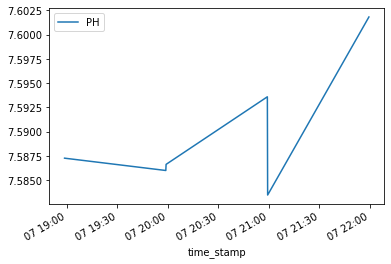

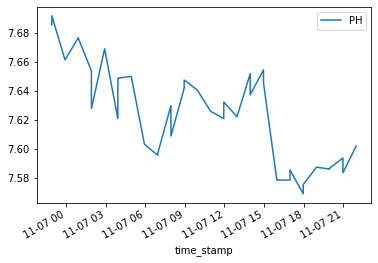

In [49]:
pool_id = 10001

ph_warning('2022-11-07 21:59:24.885', df, pool_id)